In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [2]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
%matplotlib inline

In [3]:
import pandas as pd
import numpy as np
# Read the Excel file
excel_file = pd.ExcelFile("E:\\TOPCEM internship\\Environment data 1.xlsx")

# Get the sheet names
sheet_names = excel_file.sheet_names

# Iterate over each sheet and perform operations
for sheet_name in sheet_names:
    # Read the sheet into a DataFrame
    df = excel_file.parse(sheet_name)

In [4]:
# Select a specific sheet by name
sheet_name = 'Final Product OPC1'
df = excel_file.parse(sheet_name)

# Perform operations on the selected sheet
print(df.head())

   Fineness  IST_Min  FST_Min  LC_MM  AC_per  3-Days Mpa  7-Days Mpa  \
0    351.89   164.82   224.29   1.18    0.11       23.06       33.06   
1    344.00   165.00   222.59   1.10    0.09       22.80       33.09   
2    352.90   161.61   217.58   1.00    0.07       23.51       33.85   
3    354.84   163.71   221.61   1.03    0.07       23.42       34.22   
4    360.44   163.55   223.33   1.26    0.07       23.55       34.50   

   28-Days_Mpa  IR_per  MgO_per  SO3_per  LOI_per     NC  
0        53.25   28.93     1.81     2.18     2.42  29.81  
1        52.64   28.83     1.96     2.12     2.28  30.95  
2        53.79   28.95     1.95     2.09     2.21  30.68  
3        52.72   28.75     1.98     2.14     2.26  31.05  
4        53.13   28.99     2.09     2.43     2.34  31.03  


In [5]:
# Select a specific sheet by name
sheet_name = 'Final Product OPC1'
data = excel_file.parse(sheet_name)
# Perform operations on the selected sheet
print(df.head())

   Fineness  IST_Min  FST_Min  LC_MM  AC_per  3-Days Mpa  7-Days Mpa  \
0    351.89   164.82   224.29   1.18    0.11       23.06       33.06   
1    344.00   165.00   222.59   1.10    0.09       22.80       33.09   
2    352.90   161.61   217.58   1.00    0.07       23.51       33.85   
3    354.84   163.71   221.61   1.03    0.07       23.42       34.22   
4    360.44   163.55   223.33   1.26    0.07       23.55       34.50   

   28-Days_Mpa  IR_per  MgO_per  SO3_per  LOI_per     NC  
0        53.25   28.93     1.81     2.18     2.42  29.81  
1        52.64   28.83     1.96     2.12     2.28  30.95  
2        53.79   28.95     1.95     2.09     2.21  30.68  
3        52.72   28.75     1.98     2.14     2.26  31.05  
4        53.13   28.99     2.09     2.43     2.34  31.03  


In [6]:
df.describe()

,Fineness,IST_Min,FST_Min,LC_MM,AC_per,3-Days Mpa,7-Days Mpa,28-Days_Mpa,IR_per,MgO_per,SO3_per,LOI_per,NC
count,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.00000
mean,352.845520,162.089910,220.056471,1.294253,0.155973,23.039548,33.495701,52.888824,29.011312,1.786878,2.490045,2.487692,30.25181
std,7.237354,4.266738,5.720161,0.168037,0.084426,1.096750,0.855470,1.160515,0.566263,0.225105,0.298253,0.283547,0.96713
min,340.190000,155.110000,210.110000,1.000000,0.010000,21.020000,32.000000,51.010000,28.000000,1.400000,2.010000,2.000000,28.63000
25%,346.580000,158.490000,214.640000,1.150000,0.090000,22.140000,32.790000,51.820000,28.600000,1.600000,2.210000,2.230000,29.48000
50%,352.320000,161.790000,220.680000,1.270000,0.160000,23.060000,33.480000,52.820000,28.980000,1.780000,2.490000,2.490000,30.23000
75%,359.270000,165.680000,224.700000,1.430000,0.230000,24.070000,34.230000,53.870000,29.490000,1.960000,2.730000,2.730000,31.06000
max,364.820000,169.990000,229.970000,1.600000,0.300000,24.990000,35.000000,54.950000,29.990000,2.200000,3.000000,3.000000,32.00000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Fineness     221 non-null    float64
 1   IST_Min      221 non-null    float64
 2   FST_Min      221 non-null    float64
 3   LC_MM        221 non-null    float64
 4   AC_per       221 non-null    float64
 5   3-Days Mpa   221 non-null    float64
 6   7-Days Mpa   221 non-null    float64
 7   28-Days_Mpa  221 non-null    float64
 8   IR_per       221 non-null    float64
 9   MgO_per      221 non-null    float64
 10  SO3_per      221 non-null    float64
 11  LOI_per      221 non-null    float64
 12  NC           221 non-null    float64
dtypes: float64(13)
memory usage: 22.6 KB


In [8]:
df.isnull().sum()

Fineness       0
IST_Min        0
FST_Min        0
LC_MM          0
AC_per         0
3-Days Mpa     0
7-Days Mpa     0
28-Days_Mpa    0
IR_per         0
MgO_per        0
SO3_per        0
LOI_per        0
NC             0
dtype: int64

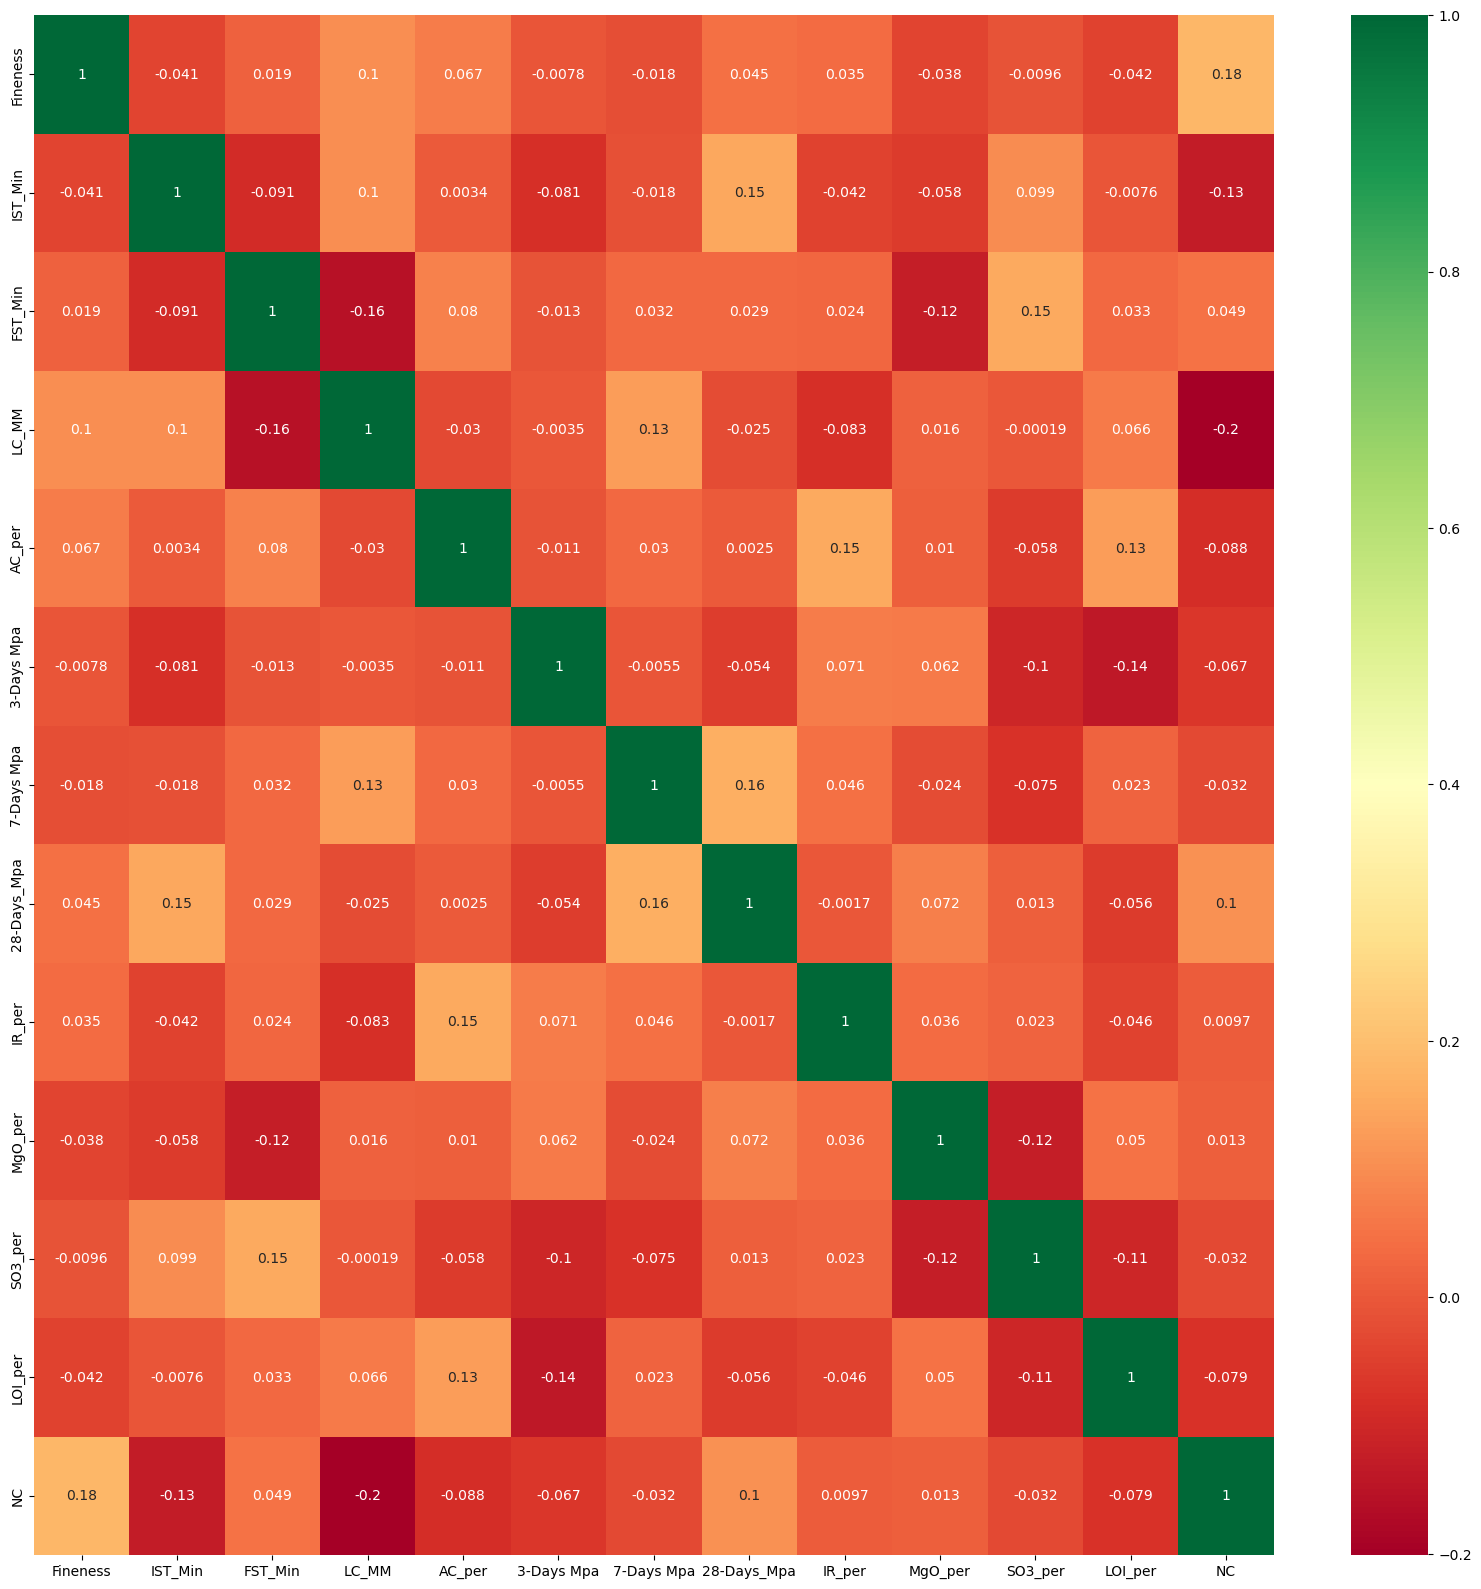

In [9]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
graph = sns.heatmap(df[top_corr_features].corr(),annot = True, cmap ="RdYlGn")

In [10]:
del df['3-Days Mpa']
del df['7-Days Mpa']

In [11]:
df.head()

,Fineness,IST_Min,FST_Min,LC_MM,AC_per,28-Days_Mpa,IR_per,MgO_per,SO3_per,LOI_per,NC
0,351.89,164.82,224.29,1.18,0.11,53.25,28.93,1.81,2.18,2.42,29.81
1,344.00,165.00,222.59,1.10,0.09,52.64,28.83,1.96,2.12,2.28,30.95
2,352.90,161.61,217.58,1.00,0.07,53.79,28.95,1.95,2.09,2.21,30.68
3,354.84,163.71,221.61,1.03,0.07,52.72,28.75,1.98,2.14,2.26,31.05
4,360.44,163.55,223.33,1.26,0.07,53.13,28.99,2.09,2.43,2.34,31.03


In [13]:
scaler = MinMaxScaler() #scaling the numeric data columns
features = [['Fineness','IST_Min','FST_Min','LC_MM', 'AC_per', 'NC', 'SO3_per', 'IR_per', 'MgO_per','LOI_per','28-Days_Mpa' ]]
for feature in features:
    df[feature] = scaler.fit_transform(df[feature])

In [14]:
df.head()

,Fineness,IST_Min,FST_Min,LC_MM,AC_per,28-Days_Mpa,IR_per,MgO_per,SO3_per,LOI_per,NC
0,0.475030,0.652554,0.713998,0.300000,0.344828,0.568528,0.467337,0.5125,0.171717,0.42,0.350148
1,0.154689,0.664651,0.628399,0.166667,0.275862,0.413706,0.417085,0.7000,0.111111,0.28,0.688427
2,0.516037,0.436828,0.376133,0.000000,0.206897,0.705584,0.477387,0.6875,0.080808,0.21,0.608309
3,0.594803,0.577957,0.579053,0.050000,0.206897,0.434010,0.376884,0.7250,0.131313,0.26,0.718101
4,0.822168,0.567204,0.665660,0.433333,0.206897,0.538071,0.497487,0.8625,0.424242,0.34,0.712166


In [15]:
# spilitting target variables and predicting variables
y = df.iloc[:,[5]].values
x = df.iloc[:,[0,1,2,3,4,6,7,8,9,10]].values

In [16]:
#splitting the dataset as 20-80 test_train data
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size= 0.15, random_state=42)

In [17]:
model = LinearRegression()
model.fit(xTrain, yTrain)

LinearRegression()

In [18]:
y_pred = model.predict(xTest)

In [19]:
y_pred

array([[0.42306597],
       [0.53485067],
       [0.49948711],
       [0.53126129],
       [0.58617118],
       [0.48270804],
       [0.59585119],
       [0.48971862],
       [0.50714243],
       [0.44792306],
       [0.5612421 ],
       [0.41492213],
       [0.50453521],
       [0.39115693],
       [0.42963831],
       [0.47075988],
       [0.48620188],
       [0.54826163],
       [0.34387601],
       [0.52264335],
       [0.46233718],
       [0.46393075],
       [0.59300492],
       [0.3918513 ],
       [0.56140816],
       [0.56259986],
       [0.48968582],
       [0.56963809],
       [0.53603247],
       [0.5017227 ],
       [0.53940474],
       [0.53043981],
       [0.5645578 ],
       [0.53722021]])

In [20]:
print("mean squared error is:", mean_squared_error(yTest, y_pred))
print("mean absolute error is:", mean_absolute_error(yTest, y_pred))

mean squared error is: 0.07306183307463895
mean absolute error is: 0.2372989599023502


In [23]:
import statistics

std_dev = statistics.stdev(data['28-Days_Mpa'])
print("Standard Deviation:", std_dev)
mean = data['28-Days_Mpa'].mean()
mean

Standard Deviation: 1.1605145687026608


52.888823529411766

In [24]:
original_pred = y_pred * std_dev + mean

In [25]:
original_pred

array([[53.37979775],
       [53.50952552],
       [53.46848559],
       [53.50536   ],
       [53.56908372],
       [53.44901324],
       [53.58031752],
       [53.45714912],
       [53.47736971],
       [53.40864477],
       [53.54015317],
       [53.37034671],
       [53.47434399],
       [53.34276685],
       [53.38742505],
       [53.43514723],
       [53.45306789],
       [53.52508914],
       [53.28789664],
       [53.49535875],
       [53.42537257],
       [53.42722192],
       [53.57701438],
       [53.34357268],
       [53.54034588],
       [53.54172886],
       [53.45711106],
       [53.54989683],
       [53.51089702],
       [53.47108003],
       [53.51481058],
       [53.50440666],
       [53.54400108],
       [53.51227541]])

In [29]:
import pickle 

In [30]:
pickle_out = open("model.pkl", "wb")
pickle.dump(model, pickle_out)
pickle_out.close()